In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [0]:
data = pd.read_csv("OnlineNewsPopularity.csv")
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


#### Checking the shape of the dataframe; number of rows and columns.

In [0]:
data.shape

(39644, 61)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null int64
n_tokens_title                   39644 non-null int64
n_tokens_content                 39644 non-null int64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null int64
num_self_hrefs                   39644 non-null int64
num_imgs                         39644 non-null int64
num_videos                       39644 non-null int64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null int64
data_channel_is_lifestyle        39644 non-null int64
data_channel_is_entertainment    39644 non-null int64
data_channel_is_bus              39644 non-null int64
data_channel_is_so

## Data Cleaning

#### Checking for Missing Values, although the UCI machine learning repository which hosts the current data set has indicated that the data set has no missing values

In [0]:
data.isnull().sum()

url                              0
timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_s

In [0]:
data.dtypes

url                               object
timedelta                          int64
n_tokens_title                     int64
n_tokens_content                   int64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                          int64
num_self_hrefs                     int64
num_imgs                           int64
num_videos                         int64
average_token_length             float64
num_keywords                       int64
data_channel_is_lifestyle          int64
data_channel_is_entertainment      int64
data_channel_is_bus                int64
data_channel_is_socmed             int64
data_channel_is_tech               int64
data_channel_is_world              int64
kw_min_min                         int64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                         int64
kw_max_max                         int64
kw_avg_max      

#### Creating the X columns to train the data.
#### From the available 60 attribute we observe that following arrttributes can be eliminated since they do not contribute towards
#### Target attribute that is Shares.
#### URL - Since every URL is unique for each column
#### 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday'
#### From following attribute we are trying to understand if the news was published on weekend and following information is available in "is_weekend" attribute

In [0]:
x=data.drop(['shares','url', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday'], axis=1)

In [0]:
x.shape

(39644, 52)

In [0]:
x.head(5)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


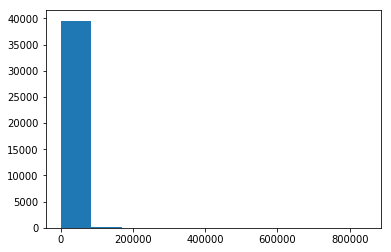

In [0]:
plt.hist(data['shares'])
plt.show()

In [0]:
np.log10(data['shares']).describe()

count    39644.000000
mean         3.246288
std          0.404105
min          0.000000
25%          2.975891
50%          3.146128
75%          3.447158
max          5.925982
Name: shares, dtype: float64

### Creating a new attribute as Category to be used as Target attribute
#### The Columns are identified as either 1 or 2 on following basis
#### Category 1 - the news artical that are shared less then 50% that is less than value 3 - Article is not much popular
#### Category 2 - the news artical that are shared more then 50% that is more than value 3 - Article is very popular

In [0]:
data_class = np.log10(data['shares'])
data['category'] = (data_class<=3)*1 | (data_class>3)*2

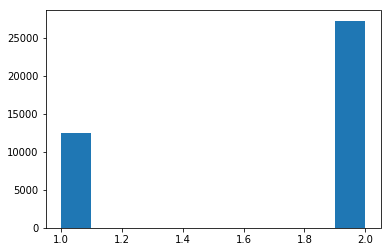

In [0]:
plt.hist(data['category'])
plt.show()

In [0]:
data.head(2)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,category
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593,1
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711,1


In [0]:
data.shape

(39644, 62)

### Declare the Y as Target
#### Using attribute Shares as the target
#### Analysing the Shares attribute

In [0]:
y=data['category']

In [0]:
x.shape

(39644, 52)

In [0]:
y.shape

(39644,)

### Implementing Decision Tree Classifier

In [0]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [0]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
rank_classifier.fit(X_train,y_train)
print(type(rank_classifier))
Predictions = rank_classifier.predict(X_test)
Predictions_train = rank_classifier.predict(X_train)

<class 'sklearn.tree.tree.DecisionTreeClassifier'>


In [0]:
Testing_Accuarcy = accuracy_score(y_true = y_test, y_pred = Predictions)
Training_Accuracy = accuracy_score(y_true = y_train, y_pred = Predictions_train)

print("========Training Acuracy ========== ")
print(Training_Accuracy)
print("========Testing Acuracy =========== ")
print(Testing_Accuarcy)

========Training Acuracy ========== 
0.7021913920857639
========Testing Acuracy =========== 
0.7016017152226006


In [0]:
confusion_matrix(y_test, Predictions)

array([[ 755, 1773],
       [ 593, 4808]])

In [0]:
confusion_matrix(y_test,Predictions)
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test, Predictions)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[ 755 1773]
 [ 593 4808]]


In [0]:
#Also known as "Misclassification Rate"how often is the classifier incorrect?
print(1 - metrics.accuracy_score(y_test,Predictions))
#Precision: When a positive value is predicted, how often is the prediction correct?
print(metrics.precision_score(y_test, Predictions))
#Sensitivity: When the actual value is positive, how often is the prediction correct?
#Also known as "True Positive Rate" or "Recall"
sensitivity = TP / float(FN + TP)
print(sensitivity)
#Specificity: When the actual value is negative, how often is the prediction correct?

#How "specific" (or "selective") is the classifier in predicting positive instances?
#TN / all negative
#all negative = TN + FP
specificity = TN / float(TN + FP)
print(specificity)
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)

0.2983982847773994
0.5600890207715133
0.8902055174967599
0.2986550632911392
0.7013449367088608


### Using Recursive feature elimination for identifying the most relevant attributes

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#use linear regression as the model
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False]
[40 38 42 26 17  7 34 32 36 35 33 31 28 11 13  9 21 14 39 46 45 49 51 48
 44 43 41 52 50 47 10  4  2  1  3  5  6 24 15  8 18 16 22 12 29 20 37 19
 27 25 23 30]


In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#use linear regression as the model
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[20 18 22 37 31 41 15 14 16 17 35 13 39  4  6  1 11  5 19 26 24 45 32 30
 25 23 21 27 29 28  2  7 12  3  9  8 46 36 50 49 34 10 44 43 47 40 38 48
 51 33 52 42]


In [0]:
x_New = data[['LDA_02','LDA_01','LDA_03','LDA_00','LDA_04','data_channel_is_socmed','is_weekend','data_channel_is_entertainment','num_keywords','global_subjectivity','num_self_hrefs','num_hrefs','num_imgs','num_videos','n_tokens_title','n_non_stop_unique_tokens','n_non_stop_words','global_rate_negative_words','data_channel_is_tech','rate_negative_words','rate_positive_words']]

In [0]:
x_New.shape

(39644, 21)

### Decision tree implementation after feature selection

In [0]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(x_New, y, test_size=0.20, random_state=42)

In [0]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
rank_classifier.fit(X_train,y_train)
print(type(rank_classifier))
Predictions = rank_classifier.predict(X_test)

<class 'sklearn.tree.tree.DecisionTreeClassifier'>


In [0]:
#calculating the accuracy score
Accuracy_DT = accuracy_score(y_true = y_test, y_pred = Predictions)
Accuracy_DT

0.6878547105561862

In [0]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test, Predictions)
print(confusion)
TP_DT = confusion[1, 1]
TN_DT = confusion[0, 0]
FP_DT = confusion[0, 1]
FN_DT = confusion[1, 0]
#fpr, tpr, thresholds = metrics.roc_curve(y_test,Predictions)

[[ 495 2033]
 [ 442 4959]]


In [0]:
#Also known as "Misclassification Rate"how often is the classifier incorrect?
print(1 - metrics.accuracy_score(y_test, Predictions))
#Precision: When a positive value is predicted, how often is the prediction correct?
print(metrics.precision_score(y_test, Predictions))
precision_DT = metrics.precision_score(y_test, Predictions)
recall_DT = metrics.recall_score(y_test, Predictions)
#Sensitivity: When the actual value is positive, how often is the prediction correct?
#Also known as "True Positive Rate" or "Recall"
#Something we want to maximize

#Specificity: When the actual value is negative, how often is the prediction correct?
sensitivity_DT = TP_DT / float(FN_DT + TP_DT)
print(sensitivity)
#Something we want to maximize
#How "specific" (or "selective") is the classifier in predicting positive instances?
#TN / all negative
#all negative = TN + FP
specificity_DT = TN_DT / (TN_DT + FP_DT)
print(specificity)

0.3121452894438138
0.528281750266809
0.8902055174967599
0.2986550632911392


In [0]:
scores_DT = cross_val_score(rank_classifier, x_New, y, cv=5).mean()
print (scores_DT)

0.690016275881343


In [0]:
y_pred_prob = rank_classifier.predict_proba(X_test)[:, 1]


#y_pred_class = binarize(y_pred_prob, 0.3)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob,pos_label=2)

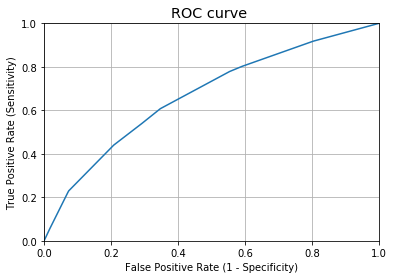

In [0]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [0]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [0]:
evaluate_threshold(0.65)

Sensitivity: 0.6076652471764488
Specificity: 0.6526898734177216


In [0]:
#loss function
from sklearn.metrics import log_loss
Loss_DT = log_loss(y_test,y_pred_prob)
Loss_DT

0.5865379459766515

### Support Vector Machines(SVM)

In [0]:
from sklearn import svm

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_New, y, test_size=0.20, random_state=42)

In [0]:
svm_classifier = svm.SVC(probability=True)
svm_classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
Predictions_svm = svm_classifier.predict(X_test)
Accuracy_SVM = accuracy_score(y_true = y_test, y_pred = Predictions_svm)
Accuracy_SVM

0.6867196367763905

In [0]:
confusion_matrix(y_test,Predictions_svm)
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test, Predictions_svm)
print(confusion)
TP_SVM = confusion[1, 1]
TN_SVM = confusion[0, 0]
FP_SVM = confusion[0, 1]
FN_SVM = confusion[1, 0]
#fpr, tpr, thresholds = metrics.roc_curve(y_test,Predictions)

[[ 131 2397]
 [  87 5314]]


In [0]:
#Also known as "Misclassification Rate"how often is the classifier incorrect?
print(1 - metrics.accuracy_score(y_test, Predictions_svm))
#Precision: When a positive value is predicted, how often is the prediction correct?
print(metrics.precision_score(y_test, Predictions_svm))
precision_SVM = metrics.precision_score(y_test, Predictions_svm)
recall_SVM = metrics.recall_score(y_test, Predictions_svm)

#Sensitivity: When the actual value is positive, how often is the prediction correct?
#Also known as "True Positive Rate" or "Recall"
#Something we want to maximize
sensitivity_SVM = TP_SVM / float(FN_SVM + TP_SVM)
print(sensitivity_SVM)
#Specificity: When the actual value is negative, how often is the prediction correct?

#Something we want to maximize
#How "specific" (or "selective") is the classifier in predicting positive instances?
#TN / all negative
#all negative = TN + FP
specificity_SVM = TN_SVM / (TN_SVM + FP_SVM)
print(specificity_SVM)

0.3132803632236095
0.6009174311926605
0.9838918718755786
0.051819620253164556


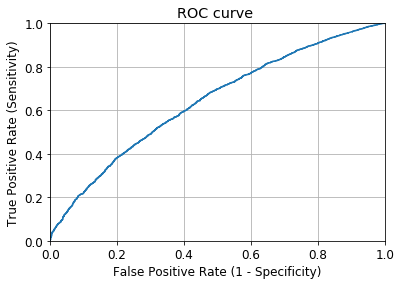

In [0]:
y_pred_prob = svm_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob,pos_label=2)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [0]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [0]:
evaluate_threshold(0.65)

Sensitivity: 0.8333641918163303
Specificity: 0.31566455696202533


In [0]:
#loss function
from sklearn.metrics import log_loss
Loss_SVM = log_loss(y_test,y_pred_prob)
Loss_SVM

0.6029603414518406

### K Nearest Neighbour(KNN)

In [0]:
from sklearn import neighbors
Accuracy_KNN = []
for i in range(3,15):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predicted_knn = knn.predict(X_test)
    Accuracy = accuracy_score(y_true = y_test, y_pred = predicted_knn)
    print("K {} value Accuracy".format(i))
    print(Accuracy)
    Accuracy_KNN.append(Accuracy)

K 3 value Accuracy
0.6382898221717745
K 4 value Accuracy
0.5979316433345945
K 5 value Accuracy
0.6491360827342666
K 6 value Accuracy
0.6241644595787615
K 7 value Accuracy
0.6593517467524278
K 8 value Accuracy
0.645352503468281
K 9 value Accuracy
0.6651532349602725
K 10 value Accuracy
0.651406230293858
K 11 value Accuracy
0.6693151721528566
K 12 value Accuracy
0.6544330937066465
K 13 value Accuracy
0.6662883087400681
K 14 value Accuracy
0.6583427922814983


In [0]:
print(max(Accuracy_KNN))
temp = np.array(Accuracy_KNN)
print("Optimal K value")
print(temp.argmax()+3) #since starting from 3 added 3

Accuracy_KNN = temp.max()

0.6693151721528566
Optimal K value
11


In [0]:
confusion_matrix(y_test,predicted_knn)
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test, predicted_knn)
print(confusion)
TP_KNN = confusion[1, 1]
TN_KNN = confusion[0, 0]
FP_KNN = confusion[0, 1]
FN_KNN = confusion[1, 0]

[[ 730 1798]
 [ 911 4490]]


In [0]:
#Also known as "Misclassification Rate"how often is the classifier incorrect?
print(1 - metrics.accuracy_score(y_test, predicted_knn))
#Precision: When a positive value is predicted, how often is the prediction correct?
print(metrics.precision_score(y_test, predicted_knn))
precision_KNN = metrics.precision_score(y_test, predicted_knn)
recall_KNN = metrics.recall_score(y_test, predicted_knn)
#Sensitivity: When the actual value is positive, how often is the prediction correct?
#Also known as "True Positive Rate" or "Recall"
#Something we want to maximize
print(metrics.recall_score(y_test,predicted_knn))
#Specificity: When the actual value is negative, how often is the prediction correct?
sensitivity_KNN = TP_KNN / float(FN_KNN + TP_KNN)
print(sensitivity_KNN)


#Something we want to maximize
#How "specific" (or "selective") is the classifier in predicting positive instances?
#TN / all negative
#all negative = TN + FP
specificity_KNN = TN_KNN / (TN_KNN + FP_KNN)
print(specificity_KNN)
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print(1 - specificity_KNN)

0.3416572077185017
0.4448507007921999
0.2887658227848101
0.8313275319385299
0.2887658227848101
0.7112341772151899


In [0]:
knn.predict_proba(X_test)[0:10]

array([[0.14285714, 0.85714286],
       [0.5       , 0.5       ],
       [0.21428571, 0.78571429],
       [0.64285714, 0.35714286],
       [0.21428571, 0.78571429],
       [0.5       , 0.5       ],
       [0.57142857, 0.42857143],
       [0.21428571, 0.78571429],
       [0.35714286, 0.64285714],
       [0.28571429, 0.71428571]])

In [0]:
scores = cross_val_score(knn, x_New, y, cv=5).mean()
print (scores)

0.6575018176579503


In [0]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]
#y = label_binarize(predicted_knn, classes=[0, 1])
#n_classes = y.shape[1]

#y_pred_class = binarize(y_pred_prob, 0.3)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob,pos_label=2)

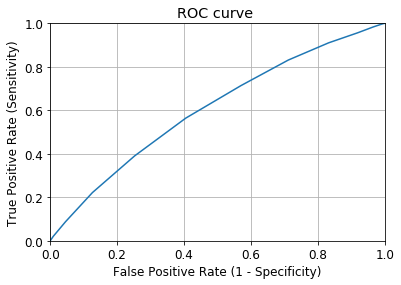

In [0]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [0]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [0]:
evaluate_threshold(0.65)

Sensitivity: 0.5643399370486947
Specificity: 0.5949367088607596


In [0]:
#loss function
from sklearn.metrics import log_loss
Loss_KNN = log_loss(y_test,y_pred_prob)
Loss_KNN

0.7207286914507727

### Results
### Comparing the models based on following factors
Accuracy , Loss , True Positive , False Positive , True Negative , False Negative , Sensitivity , Precision and Recall

In [0]:
resultdf = pd.DataFrame(columns=["Model","Accuracy","Loss","TP","FP","TN","FN","Sensitivity","Specificity","Precision","Recall"])
resultdf.loc[0] = ["Decision Tree", Accuracy_DT,Loss_DT,TP_DT,FP_DT,TN_DT,FN_DT,sensitivity_DT, specificity_DT,precision_DT,recall_DT]
resultdf.loc[1] = ["SVM", Accuracy_SVM, Loss_SVM, TP_SVM,FP_SVM,TN_SVM,FN_SVM,sensitivity_SVM, specificity_SVM,precision_SVM,recall_SVM]
resultdf.loc[2] = ["KNN", Accuracy_KNN,Loss_KNN, TP_KNN,FP_KNN,TN_KNN,FN_KNN, sensitivity_KNN,specificity_KNN,precision_KNN,recall_KNN]
resultdf

,Model,Accuracy,Loss,TP,FP,TN,FN,Sensitivity,Specificity,Precision,Recall
0,Decision Tree,0.687855,0.586538,4959,2033,495,442,0.918163,0.195807,0.528282,0.195807
1,SVM,0.686720,0.602960,5314,2397,131,87,0.983892,0.051820,0.600917,0.051820
2,KNN,0.669315,0.720729,4490,1798,730,911,0.831328,0.288766,0.444851,0.288766
